In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
%matplotlib inline
from multiprocessing import Queue
import pickle
import cv2
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,ELU, Lambda, Activation
from keras.layers import SpatialDropout2D,Cropping2D,Convolution2D,MaxPooling2D
from sklearn.utils import shuffle
from keras.regularizers import l2
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
#from keras.utils import plot_model
from IPython.display import SVG
from sklearn.preprocessing import MinMaxScaler
import glob

Using TensorFlow backend.


In [7]:
scalerfile = 'scaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))
model = load_model('gesture_predict.h5')

In [8]:
X_test = np.load('X_test.npy')[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
y_test = np.load('y_test.npy')
norm_vec_test = np.zeros((X_test.shape[0],12))
for i in range(X_test.shape[0]):
    for j in range(3):
        norm_vec_test[i,2*j]=(X_test[i,2*j+2]-X_test[i,2*j])/((X_test[i,2*j+2]-X_test[i,2*j])**2+(X_test[i,2*j+3]-X_test[i,2*j+1])**2)**0.5
        norm_vec_test[i,2*j+1]=(X_test[i,2*j+3]-X_test[i,2*j+1])/((X_test[i,2*j+2]-X_test[i,2*j])**2+(X_test[i,2*j+3]-X_test[i,2*j+1])**2)**0.5
    norm_vec_test[i,6] = (X_test[i,8]-X_test[i,0])/((X_test[i,8]-X_test[i,0])**2+(X_test[i,9]-X_test[i,1])**2)**0.5
    norm_vec_test[i,7] = (X_test[i,9]-X_test[i,1])/((X_test[i,8]-X_test[i,0])**2+(X_test[i,9]-X_test[i,1])**2)**0.5
    for j in range(2):
        norm_vec_test[i,8+2*j]=(X_test[i,2*j+10]-X_test[i,2*j+8])/((X_test[i,2*j+10]-X_test[i,2*j+8])**2+(X_test[i,2*j+11]-X_test[i,2*j+9])**2)**0.5
        norm_vec_test[i,9+2*j]=(X_test[i,2*j+11]-X_test[i,2*j+9])/((X_test[i,2*j+10]-X_test[i,2*j+8])**2+(X_test[i,2*j+11]-X_test[i,2*j+9])**2)**0.5
        

In [9]:
X_test_normed = scaler.fit_transform(norm_vec_test)

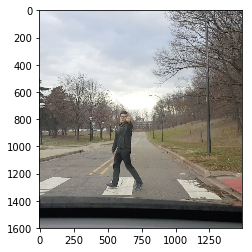

The intention of the human is: Stopping the vehicle
The probability of Stopping the vehicle is 0.6292372345924377
The probability of lane changing is 0.00034398966818116605
The probability of calling taxi is 0.3704187870025635


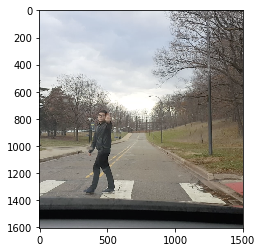

The intention of the human is: Stopping the vehicle
The probability of Stopping the vehicle is 0.7761166095733643
The probability of lane changing is 4.53307839052286e-05
The probability of calling taxi is 0.22383804619312286


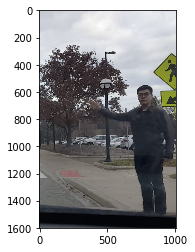

The intention of the human is: Calling taxi
The intention of the human is: Lane changing
The probability of Stopping the vehicle is 0.0022929024416953325
The probability of lane changing is 0.006722069811075926
The probability of calling taxi is 0.9909850358963013


In [18]:
test_index_list = [1,7,13]
for test_index in test_index_list:
    plt.figure()
    test_image_path = "data/Test_total/test{}.jpg".format(test_index)
    test_image = plt.imread(test_image_path)
    plt.imshow(test_image)
    test_image_x = X_test_normed[test_index - 1, :]
    test_image_y = y_test[test_index - 1, 0]
    X_test_cus = []
    X_test_cus.append(np.reshape(test_image_x,(12,1,1)))
    X_test_cus = np.array(X_test_cus)
    proba = model.predict(X_test_cus,batch_size = 1)
    plt.show()
    if test_image_y == 1:
        print ("The intention of the human is: Stopping the vehicle")
    if test_image_y == 2:
        print ("The intention of the human is: Calling taxi")
    if test_image_y == 2:
        print ("The intention of the human is: Lane changing")
    print("The probability of Stopping the vehicle is {}".format(proba[0,1]))
    print("The probability of lane changing is {}".format(proba[0,0]))
    print("The probability of calling taxi is {}".format(proba[0,2]))